In [1]:
import requests as rq
import pandas as pd
import csv

Data = rq.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

with open('iris.data','w') as f:
     f.write(Data.text)

with open('iris.data') as f:
    reader = csv.reader(f)
    iris_data = [x for x in reader]   
            
iris_DataFrame = pd.DataFrame(iris_data)
iris_DataFrame.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class']
iris_DataFrame

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
datos1 = iris_DataFrame[['Sepal_Length','Sepal_Width', 'Petal_Length', 'Petal_Width']].astype('float')
datos1['Class'] = iris_DataFrame['Class'].astype('str')

In [3]:
#pip install graphviz
#pip install pydotplus

     -------------------------------------- 47.0/47.0 kB 593.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
iris_DataFrame.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
count,150,150,150,150,150
unique,35,23,43,22,3
top,5.0,3.0,1.5,0.2,Iris-setosa
freq,10,26,14,28,50


In [6]:
datos1.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
from pandas import read_csv

url = "https://www.openml.org/data/get_csv/61/dataset_61_iris.arff"
dataset = read_csv(url)
print(dataset.shape)

(150, 5)


In [9]:
print(dataset.head(3))

   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa


In [10]:
print(dataset.describe())

       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [11]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [12]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

url = "https://www.openml.org/data/get_csv/61/dataset_61_iris.arff"
# La siguiente línea no es necesaria usando esta fuente, pues ya incluye la cabecera
#names = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class']
#dataset = read_csv(url, names=names)
dataset = read_csv(url)

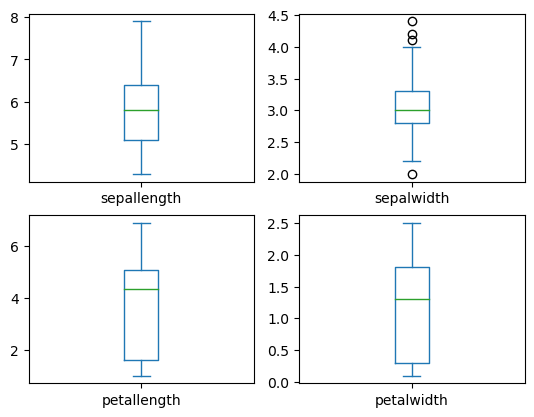

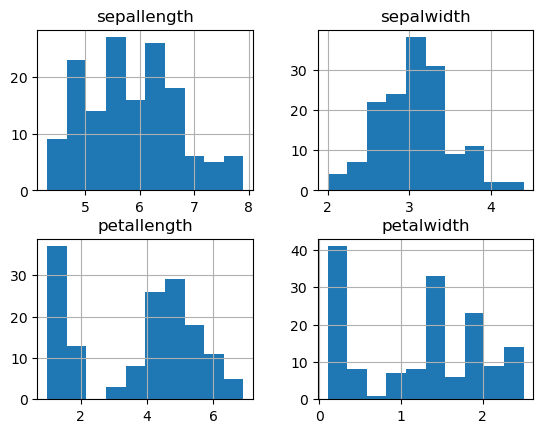

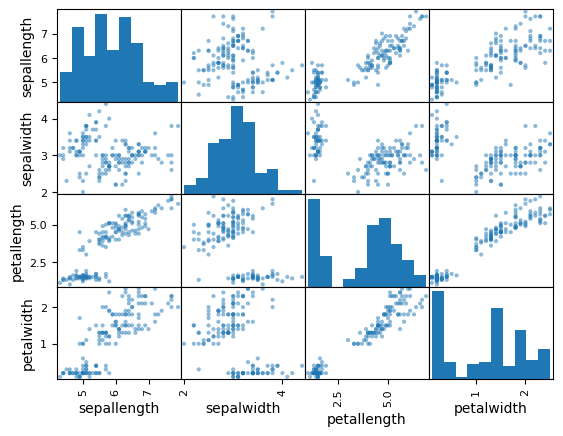

In [13]:
# gráficos univariable:
 # diagramas de caja (box and whisker)
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

 # histogramas
dataset.hist()
pyplot.show()

# gráficos multivariable
 # matriz de dispersión
scatter_matrix(dataset)
pyplot.show()

In [14]:
# Load libraries
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [27]:
# Cargamos el dataset
url = "https://www.openml.org/data/get_csv/61/dataset_61_iris.arff"
dataset = read_csv(url)

# Dividimos el dataset en 80% de datos para entrenar y 20% para testear
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, 
test_size=0.20, random_state=1, shuffle=True)

# Cargamos los algoritmos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('CART', DecisionTreeClassifier()))

LR: 0.950000 (0.055277)
CART: 0.941667 (0.075000)


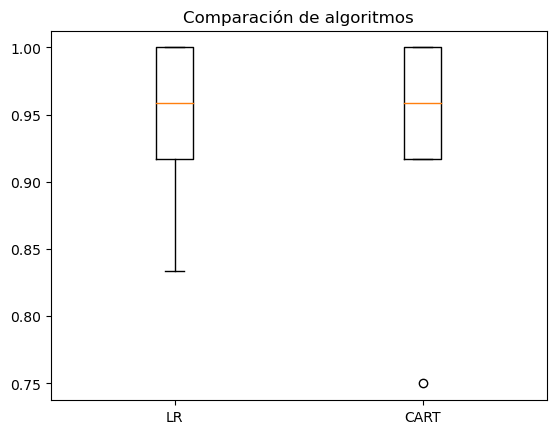

In [32]:
# evaluamos cada modelo por turnos
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10) #, random_state=1 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Comparación de algoritmos
pyplot.boxplot(results, labels=names)
pyplot.title('Comparación de algoritmos')
pyplot.show()

#>LR: 0.941667 (0.065085)
#>CART: 0.950000 (0.040825)



In [33]:
# Load libraries
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Cargamos el dataset
url = "https://www.openml.org/data/get_csv/61/dataset_61_iris.arff"
dataset = read_csv(url)

# Dividimos el dataset en 80% de datos para entrenar y 20% para testear
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, 
test_size=0.20, random_state=1, shuffle=True)

In [34]:
# Realizamos predicciones con el dataset de validación
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluamos las predicciones, en primer lugar la precisión obtenida
print(accuracy_score(Y_validation, predictions))
#> 0.9666666666666667

# ahora la matriz de confusión (vemos en este ejemplo que sólo hemos cometido un fallo)
print(confusion_matrix(Y_validation, predictions))
#>[[11  0  0]
#> [ 0 12  1]
#> [ 0  0  6]]

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [36]:
# y finalmente un informe de clasificación que ofrece un desglose de cada clase por precisión, 
#recuerdo, puntuación f1 y apoyo, mostrando excelentes resultados 
#(dado que el conjunto de datos de validación era pequeño).
#print(classification_report(Y_validation, predictions))
#>                 precision    recall  f1-score   support
#>
#>    Iris-setosa       1.00      1.00      1.00        11
#>Iris-versicolor       1.00      0.92      0.96        13
#> Iris-virginica       0.86      1.00      0.92         6
#>
#>       accuracy                           0.97        30
#>      macro avg       0.95      0.97      0.96        30
#>   weighted avg       0.97      0.97      0.97        30

# realizamos una predicción de ejemplo:
print(model.predict([[6.0, 3.0, 5.0, 2.0]]))
#>['Iris-virginica']

['Iris-virginica']


In [37]:
# Load libraries
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Cargamos el dataset
url = "https://www.openml.org/data/get_csv/61/dataset_61_iris.arff"
dataset = read_csv(url)

In [38]:
# Dividimos el dataset en 80% de datos para entrenar y 20% para testear
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, 
test_size=0.20, random_state=1, shuffle=True)

# Realizamos predicciones con el dataset de validación
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# damos detalles sobre el modelo
print(model)

DecisionTreeClassifier()


In [47]:
# mostramos el árbol gráifcamente
data = tree.export_graphviz(model, out_file=None, feature_names=dataset.columns.values[0:4], class_names=["setosa", "versicolor", "virginica"], filled=True, rounded=True, special_characters=True)  

graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

InvocationException: GraphViz's executables not found

In [40]:
DecisionTreeClassifier(ccp_alpha=0.0,
class_weight=None,
criterion='gini',
max_depth=None,
max_features=None,
max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_impurity_split=None,
min_samples_leaf=1,
min_samples_split=2,
min_weight_fraction_leaf=0.0,
presort='deprecated',
random_state=None,
splitter='best')

TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'min_impurity_split'